# Text Classification on Boston Traffic Complaints

*A classification technique to predict text data and model semantic categories*

*Authors:* Ketul Patel, Harsh Nisar




## Objective

The objective of this project is to do text classification on a dataset of complaints about traffic conditions to the city of Boston. The dataset we use can be found here: https://data.boston.gov/dataset/vision-zero-entry

To reach this objective, there are two main steps we will perform:

1. Predict the type of complaint (“REQUESTTYPE”) from the complaint text.
2. Strategize a better categorization of the data into semantic categories.



## Technique Summary

### Step 1: Data Preparation & Preprocessing

Basic data import and preprocessing techniques, with the following additional steps:

- Clean up the target label REQUESTTYPE
- Remove duplicates
- Visualize class distributions
- Split to training and test dataset


### Step 2: Bag-of-Word Models

Run a baseline multi-class classification model using a bag-of-word approach, followed by :

- Several BOW models attempts with tuned parameters
- Macro f1-score report
- Confusion matrix
- Interpretation on modeling mistakes.

### Step 3: N-Gram-based Models

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

- N-gram count vectorizer
- Tfidf transformation
- Normalization with lemmatization
- Normalization with stemming

### Step 4: Result Visualizations

Visualize results of the tuned model:

- Classification results
- Tuned model visualization
- Confusion matrix
- Important feature plots
- Example mistakes

### Step 5: Clustering Techniques

Apply the following techniques to the dataset:

- LDA
- NMF
- K-Means Then find clusters or topics that match well with some of the ground truth labels. Use ARI to compare the methods and visualize topics and clusters.

### Step 6: Improved Classification Techniques

Here are some steps to improve the text model:

- Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model.
- Re-assign labels using either the results of clustering or using keywords that you found during data exploration.
- Deal with large “other” category by applying topic modeling and clustering techniques.
- Report accuracy using macro average f1 score.

### Step 7: Doc2Vec Models

Use a word embedding representation like word2vec for step 3 and or step 6:

- Read and preprocess text
- Train model
- Assess model
- Test model

### Step 8: Visualizing Complaints in Boston Map

Visualize the geographic distribution of complaints using:

- Scatterplot
- Heatmap

You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Main Analysis



## Step 1: Data Preparation & Preprocessing

Steps: Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated.


### Load data

In [24]:
# Add your code for task 1 here. You may use multiple cells. 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import time
#import shapely
#import geopandas as gpd
from scipy import ndimage
from pandas.io.gbq import read_gbq
plt.rcParams["figure.dpi"] = 100
pylab.rcParams['figure.figsize'] = 8, 6
np.set_printoptions(precision=3, suppress=True)

In [25]:
df = pd.read_csv("Vision_Zero_Entry.csv")
print(df.shape)
df.head()

(9370, 11)


,X,Y,OBJECTID,GLOBALID,REQUESTID,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,USERTYPE
0,-71.058698,42.343489,14807,NaN,14807.0,bike facilities don't exist or need improvement,2016-01-19T14:43:50.000Z,Unassigned,0,Broadway Bridge is wide & off highway ramps. V...,bikes
1,-71.054144,42.354168,14808,NaN,14808.0,of something that is not listed here,2016-01-19T14:48:45.000Z,Unassigned,0,This intersection is dangerous. Cars don't fol...,bikes
2,-71.099480,42.339384,14809,NaN,14809.0,people don't yield while going straight,2016-01-19T14:57:03.000Z,Unassigned,0,It's terrifying to walk over here. It seems li...,walks
3,-71.066565,42.349365,14810,NaN,14810.0,it’s hard to see / low visibility,2016-01-19T15:36:25.000Z,Unassigned,0,cars coming around the corner of this wide one...,walks
4,-71.114414,42.301993,14811,NaN,14811.0,people don't yield while turning,2016-01-19T21:26:54.000Z,Unassigned,0,"as you come off the bike path, it's unclear ho...",bikes


In [26]:
# check data types
df.dtypes

X              float64
Y              float64
OBJECTID         int64
GLOBALID       float64
REQUESTID      float64
REQUESTTYPE     object
REQUESTDATE     object
STATUS          object
STREETSEGID      int64
COMMENTS        object
USERTYPE        object
dtype: object

### Clean up the target label REQUESTTYPE

In [27]:
# original version:
np.unique(df['REQUESTTYPE'])

array(['" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street',
       '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long',
       '" src="images/06 - Speeding.png"></span>&nbsp;people speed',
       '" src="images/10 - Hard to see.png"></span>&nbsp;it\xe2\x80\x99s hard to see / low visibility',
       '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement',
       '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement',
       '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here',
       "bike facilities don't exist or need improvement",
       "it's too far / too many lanes to cross",
       'it\xe2\x80\x99s hard for people to see each other',
       'it\xe2\x80\x99s hard to see / low visibility',
       'of something that is not listed here',
       'people are not

In [28]:
# clean version:
for ind, word in enumerate(df['REQUESTTYPE']):
    if 'src="images' in word:
        df['REQUESTTYPE'][ind] = word[word.index('&nbsp;')+6:]

for word in np.unique(df['REQUESTTYPE']):
    print(word)

C:\Users\ketul\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


bike facilities don't exist or need improvement
it's too far / too many lanes to cross
it’s hard for people to see each other
it’s hard to see / low visibility
of something that is not listed here
people are not given enough time to cross the street
people cross away from the crosswalks
people don't yield while going straight
people don't yield while turning
people double park their vehicles
people have to cross too many lanes / too far
people have to wait too long for the "Walk" signal
people run red lights / stop signs
people speed
sidewalks/ramps don't exist or need improvement
the roadway surface needs improvement
the roadway surface needs maintenance
the wait for the "Walk" signal is too long
there are no bike facilities or they need maintenance
there are no sidewalks or they need maintenance
there's not enough time to cross the street


### Remove duplicates

In removing the duplicates, we'll look at all data and pay attention carefully at REQUESTTYPE, COMMENTS, and USERTYPE columns.

In [29]:
df['is_duplicated'] = df.duplicated(['REQUESTTYPE','COMMENTS','USERTYPE'])               
df = df.loc[df['is_duplicated'] == False]                       
df = df.drop(["is_duplicated"], axis = 1)                     
df.shape         

(7273, 11)

### Visualize class distributions

In [30]:
from collections import Counter

cnt = Counter()
for word in df['REQUESTTYPE'].as_matrix():
    cnt[word] += 1
cnt

Counter({"bike facilities don't exist or need improvement": 750,
         "it's too far / too many lanes to cross": 96,
         'it\xe2\x80\x99s hard for people to see each other': 27,
         'it\xe2\x80\x99s hard to see / low visibility': 428,
         'of something that is not listed here': 1592,
         'people are not given enough time to cross the street': 10,
         'people cross away from the crosswalks': 275,
         "people don't yield while going straight": 286,
         "people don't yield while turning": 491,
         'people double park their vehicles': 468,
         'people have to cross too many lanes / too far': 27,
         'people have to wait too long for the "Walk" signal': 31,
         'people run red lights / stop signs': 729,
         'people speed': 930,
         "sidewalks/ramps don't exist or need improvement": 334,
         'the roadway surface needs improvement': 233,
         'the roadway surface needs maintenance': 35,
         'the wait for the "Wa

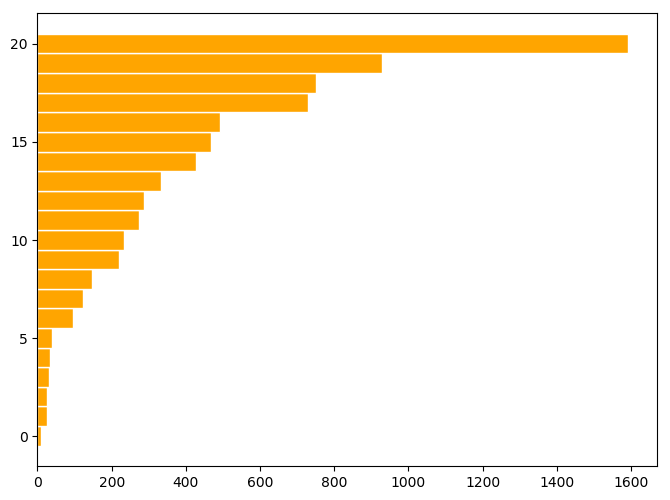

In [39]:
labels, values = zip(*Counter(df['REQUESTTYPE']).items())
inds = np.argsort(values)
sorted_values = []
sorted_labels = []
for i in inds:
    sorted_values.append(values[i])
    
    sorted_labels.append(labels1)
labels = tuple(sorted_labels)
values = tuple(sorted_values)
indexes = np.arange(len(labels))
width = 1
plt.barh(indexes, values, width, color = "orange", edgecolor='white')

plt.show()


### Split to training and test dataset

In [40]:
df1 = df.copy()
df1 = df1[~df1['COMMENTS'].isnull()]
y1 = df1['REQUESTTYPE']
X1 = df1['COMMENTS']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

## Step 2: Bag-of-Word Models

Steps: Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5), visualize the confusion matrix, and interpret the mistakes made by the model.

In [42]:
# Scikit import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import re

In [43]:
vect = CountVectorizer(token_pattern = r"\b\w\w+\b")
vect.fit(df['REQUESTTYPE'])
blacklist = vect.get_feature_names()
print(blacklist)

[u'are', u'away', u'bike', u'cross', u'crosswalks', u'don', u'double', u'each', u'enough', u'exist', u'facilities', u'far', u'for', u'from', u'given', u'going', u'hard', u'have', u'here', u'improvement', u'is', u'it', u'lanes', u'lights', u'listed', u'long', u'low', u'maintenance', u'many', u'need', u'needs', u'no', u'not', u'of', u'or', u'other', u'park', u'people', u'ramps', u'red', u'roadway', u'run', u'see', u'sidewalks', u'signal', u'signs', u'something', u'speed', u'stop', u'straight', u'street', u'surface', u'that', u'the', u'their', u'there', u'they', u'time', u'to', u'too', u'turning', u'vehicles', u'visibility', u'wait', u'walk', u'while', u'yield']


In [44]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 67
Vocabulary content:
 {u'walk': 64, u'facilities': 10, u'signs': 45, u'speed': 47, u'given': 14, u'from': 13, u'to': 58, u'there': 55, u'long': 25, u'improvement': 19, u'their': 54, u'bike': 2, u'too': 59, u'maintenance': 27, u'listed': 24, u'roadway': 40, u'lanes': 22, u'that': 52, u'far': 11, u'stop': 48, u'visibility': 62, u'they': 56, u'not': 32, u'going': 15, u'double': 6, u'signal': 44, u'yield': 66, u'while': 65, u'each': 7, u'straight': 49, u'are': 0, u'people': 37, u'is': 20, u'hard': 16, u'it': 21, u'surface': 51, u'see': 42, u'street': 50, u'exist': 9, u'something': 46, u'have': 17, u'need': 29, u'turning': 60, u'crosswalks': 4, u'needs': 30, u'for': 12, u'no': 31, u'away': 1, u'sidewalks': 43, u'cross': 3, u'lights': 23, u'enough': 8, u'other': 35, u'low': 26, u'red': 39, u'run': 41, u'park': 36, u'of': 33, u'ramps': 38, u'here': 18, u'wait': 63, u'don': 5, u'many': 28, u'vehicles': 61, u'time': 57, u'the': 53, u'or': 34}


In [45]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("All features:\n{}".format(feature_names[:]))

Number of features: 67
All features:
[u'are', u'away', u'bike', u'cross', u'crosswalks', u'don', u'double', u'each', u'enough', u'exist', u'facilities', u'far', u'for', u'from', u'given', u'going', u'hard', u'have', u'here', u'improvement', u'is', u'it', u'lanes', u'lights', u'listed', u'long', u'low', u'maintenance', u'many', u'need', u'needs', u'no', u'not', u'of', u'or', u'other', u'park', u'people', u'ramps', u'red', u'roadway', u'run', u'see', u'sidewalks', u'signal', u'signs', u'something', u'speed', u'stop', u'straight', u'street', u'surface', u'that', u'the', u'their', u'there', u'they', u'time', u'to', u'too', u'turning', u'vehicles', u'visibility', u'wait', u'walk', u'while', u'yield']


Vocabulary size and the number of feature names are consistent.

In [46]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

"""
Best classifiers as per the internet for text classification

BernoulliNB
GaussianNB
MultinomialNB

LinearSVC
PolynomialSVC
RbfSVC
NuSVC 

TfidfTransformer used in pipeline
"""
def standard_approach(X, y, 
                      vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b"),
                      classifier = LogisticRegression(),
                      scaling = None):
    if scaling is not None:
        pipe = make_pipeline(vectorizer, scaling, classifier)
    else:
        pipe = make_pipeline(vectorizer, classifier)
        
    scores = cross_val_score(pipe, X, y, cv=5, scoring = 'f1_macro')
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    test = np.mean(y_pred == y_test)
    
    return scores, np.mean(scores), test

In [47]:
print('First 5 lines of X_train:\n\n',X_train[:5],'\n')
print('List of unique words on y_train:\n\n',np.unique(y_train))

('First 5 lines of X_train:\n\n', 9287    Bike lanes are too close to traffic, would pre...
9042             People disobey the no right turn on red.
6300    some entrances/exits are 2 lanes some are 1, n...
1223    Cars coming up Hampden run thru yellow & red l...
5342    There is no safe biking along route 9 here or ...
Name: COMMENTS, dtype: object, '\n')
('List of unique words on y_train:\n\n', array(["bike facilities don't exist or need improvement",
       "it's too far / too many lanes to cross",
       'it\xe2\x80\x99s hard for people to see each other',
       'it\xe2\x80\x99s hard to see / low visibility',
       'of something that is not listed here',
       'people are not given enough time to cross the street',
       'people cross away from the crosswalks',
       "people don't yield while going straight",
       "people don't yield while turning",
       'people double park their vehicles',
       'people have to cross too many lanes / too far',
       'people have to wa

In [48]:
names = ['BernouliNB', 'MultinomialNB', 'LogisticRegression', 'LinearSVC']
classifiers = [BernoulliNB(), MultinomialNB(), LogisticRegression(), LinearSVC()]

print('Using f-1 macro score:\n')
# without scaling for now
for i in range(len(names)):
    scores, m, t = standard_approach(X_train, y_train, classifier = classifiers[i])
#     print("Mean cross val score of %s with Standard Approach:" %names[i], m)
    print("Mean score of %s with Standard Approach:" %names[i], t)

Using f-1 macro score:



C:\Users\ketul\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('Mean score of BernouliNB with Standard Approach:', 0.43982251802551303)
('Mean score of MultinomialNB with Standard Approach:', 0.5185801442041043)
('Mean score of LogisticRegression with Standard Approach:', 0.5529672767609539)
('Mean score of LinearSVC with Standard Approach:', 0.5036051026067665)


Based on our baseline models above, our highest performing model is Logistic Regression and we will take a look more on our scores below.

#### F-1, Precision, and Recall Scores

In [57]:
from sklearn.metrics import classification_report

pipe = make_pipeline(CountVectorizer(token_pattern = r"\b\w\w+\b"), 
                     LogisticRegression())  
 
pipe.fit(X_train, y_train)   
y_pred = pipe.predict(X_test)   
print("Test set predictions:\n {}\n".format(y_pred))    
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))  


Test set predictions:
 ['of something that is not listed here'
 'people run red lights / stop signs'
 "sidewalks/ramps don't exist or need improvement" ...
 'people cross away from the crosswalks'
 "bike facilities don't exist or need improvement" 'people speed']

Test set score: 0.55


In [ ]:
print(classification_report(y_test, y_pred))

In [53]:

complaints_map_reindexed = {
                0 : 'J-walking',
                1 : 'bike facilities dont exist or need improvement',
                2 : 'double parking',
                3 : 'failure to yield',
                4 : 'low visibility',
                5 : 'other',
                6 : 'ramps or sidewalks',
                7 : 'roadway improvement',
                8 : 'speeding',
                9 : 'too far or too many lanes to cross or not enough time',
                10 : 'wait for walk signal'
                }

#### Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

conf_arr = confusion_matrix(y_test, y_pred)

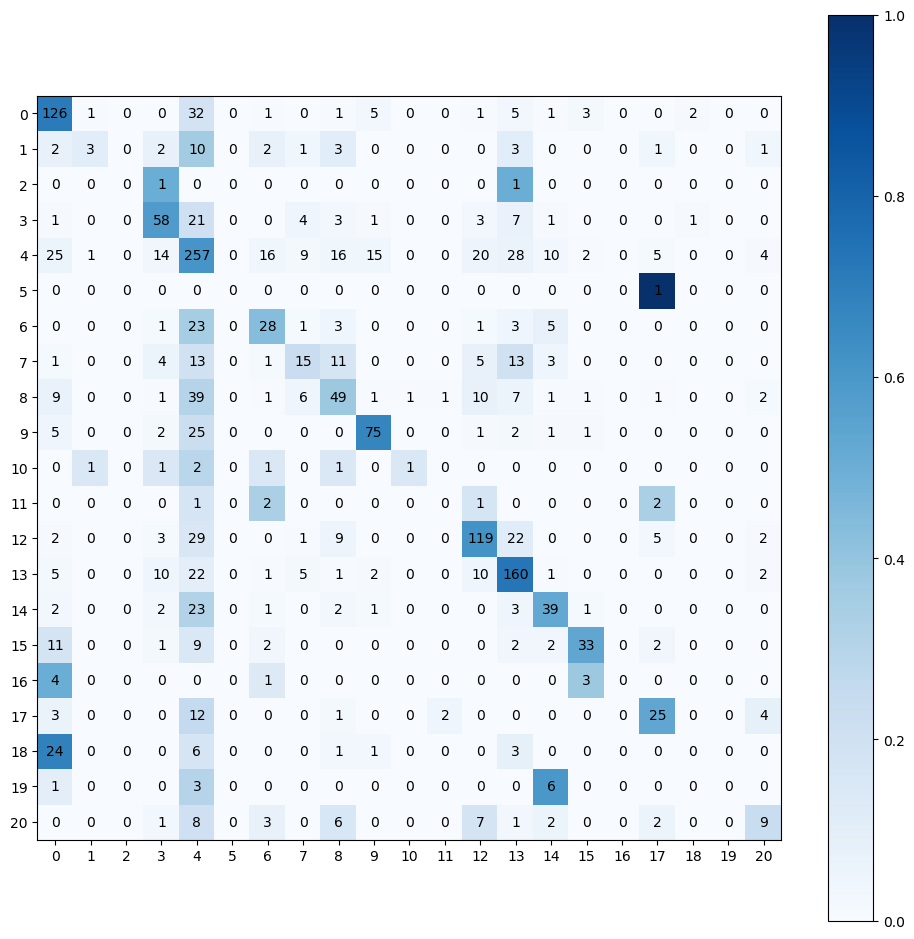

Complaints Index Map:
(0, ':', 'bike facilities dont exist or need improvement')
(1, ':', 'its too far too many lanes to cross')
(2, ':', 'its hard for people to see each other')
(3, ':', 'its hard to see or low visibility')
(4, ':', 'of something that is not listed here')
(5, ':', 'people are not given enough time to cross the street')
(6, ':', 'people cross away from the crosswalks')
(7, ':', 'people dont yield while going straight')
(8, ':', 'people dont yield while turning')
(9, ':', 'people double park their vehicles')
(10, ':', 'people have to cross too many lanes or too far')
(11, ':', 'people have to wait too long for the Walk signal')
(12, ':', 'people run red lights or stop signs')
(13, ':', 'people speed')
(14, ':', 'sidewalks or ramps dont exist or need improvement')
(15, ':', 'the roadway surface needs improvement')
(16, ':', 'the roadway surface needs maintenance')
(17, ':', 'the wait for the "Walk" signal is too long')
(18, ':', 'no bike facilities or they need maintenan

In [55]:
plt.rcParams["figure.dpi"] = 100
pylab.rcParams['figure.figsize'] = 12, 12

norm_conf = []

def xrange(x):
    return iter(range(x))

for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap="Blues", interpolation='nearest')

width, height = conf_arr.shape
for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
plt.xticks(range(width),)
plt.yticks(range(height),)
plt.show()

complaints_map_origin = {
        0 : 'bike facilities dont exist or need improvement',
        1 : 'its too far too many lanes to cross',
        2 : 'its hard for people to see each other',
        3 : 'its hard to see or low visibility',
        4 : 'of something that is not listed here',
        5 : 'people are not given enough time to cross the street',
        6 : 'people cross away from the crosswalks',
        7 : 'people dont yield while going straight',
        8 : 'people dont yield while turning',
        9 : 'people double park their vehicles',
        10 : 'people have to cross too many lanes or too far',
        11 : 'people have to wait too long for the Walk signal',
        12 : 'people run red lights or stop signs',
        13 : 'people speed',
        14 : 'sidewalks or ramps dont exist or need improvement',
        15 : 'the roadway surface needs improvement',
        16 : 'the roadway surface needs maintenance',
        17 : 'the wait for the "Walk" signal is too long',
        18 : 'no bike facilities or they need maintenance',
        19 : 'no sidewalks or they need maintenance',
        20 : 'not enough time to cross the street'
        }
        
print('Complaints Index Map:')
for i in complaints_map_origin:
    print(i,":",complaints_map_origin[i])

With our final score is 0.52, there are some classification mistakes from the model that can be found on the confusion matrix we plotted above. We saw that there are many digits that are misclassified, which causes the score to be very low. For instance, there are 26 digit 0's (bike facilities dont exist or need improvement) that are misclassified as 4 (of something that is not listed here). There are 22 digit 18's (failure to yield) also misclassified as digit 0 (bike facilities dont exist or need improvement). There are also many zeros in the diagonal lines, meaning we have some false segatives

There are also misclassifications of 'other' digits, such as 13 of them misclassified as digit 6 (ramps or sidewalks), and 28 of them misclassified as 'bike facilities dont exist or need improvement' (class 1). Some other tendency for mistakes can also be found in digit 9 (too far or too many lanes to cross or not enough time), where 12 of them are misclassified as class 3 (failure to yield) and 5 of them as class 10 (wait for walk signal).


## Step 3: N-Gram-based Models

Steps: Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

C:\Users\ketul\Anaconda2\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ketul\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


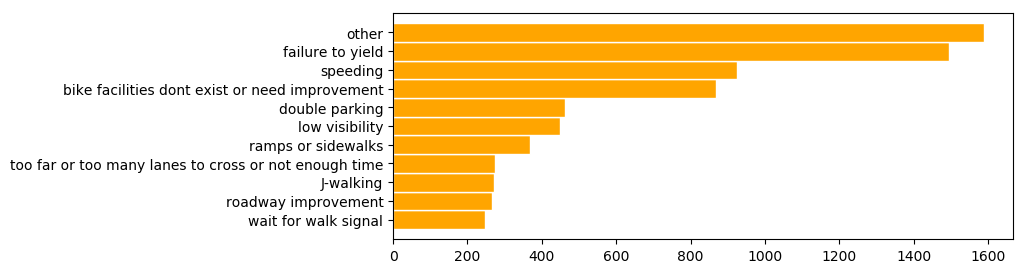

In [60]:
# clean version:

plt.rcParams["figure.dpi"] = 100
pylab.rcParams['figure.figsize'] = 8, 3

type_to_key = [0, 1, 2, 2, 3, 1, 4, 5, 5, 6, 1, 7, 5, 8, 9, 10, 10, 7, 0, 9, 1]
complaints_map = {
                0 : 'bike facilities dont exist or need improvement',
                1 : 'too far or too many lanes to cross or not enough time',
                2 : 'low visibility',
                3 : 'other',
                4 : 'J-walking',
                5 : 'failure to yield',
                6 : 'double parking',
                7 : 'wait for walk signal',
                8 : 'speeding',
                9 : 'ramps or sidewalks',
                10 : 'roadway improvement'
                }

df['code'] = df['REQUESTTYPE']
df['y_true'] = df['REQUESTTYPE']
df = df[~df['COMMENTS'].isnull()]


for i, line in enumerate(np.unique(df['REQUESTTYPE'])):
    df['code'][df['REQUESTTYPE'] == line] = complaints_map[type_to_key[i]]
    df['y_true'][df['REQUESTTYPE'] == line] = type_to_key[i]


y = df['code']
X = df['COMMENTS']
y_true = list(df['y_true'])


labels, values = zip(*Counter(y).items())
inds = np.argsort(values)
sorted_values = []
sorted_labels = []

for i in inds:
    sorted_values.append(values[i])
    sorted_labels.append(labels[i])

labels = tuple(sorted_labels)
values = tuple(sorted_values)
indexes = np.arange(len(labels))
width = 1

plt.barh(indexes, values, width, color = "orange", edgecolor='white')
plt.yticks(indexes + width -1, labels)
plt.show()

Note: We just grouped by the same meaning from 21 categories down to 11.

### N-Grams Count Vectorizer

In [61]:
# 1-gram

vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b", ngram_range=(1, 1)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 6106
('Training set CV scores:', '[0.379 0.321 0.349 0.349 0.355]', 'with mean of', '0.35054184220206985')
Test set score: 0.55


As we can see, using a unigram does not improve our model because the default in vectorizer is using n=1.

In [62]:
# 2-gram

vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b", ngram_range=(2, 2)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 47564
('Training set CV scores:', '[0.352 0.303 0.313 0.298 0.324]', 'with mean of', '0.31801737167307786')
Test set score: 0.51


In [63]:
# 3-gram

vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b", stop_words="english", ngram_range=(3, 3)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 54611
('Training set CV scores:', '[0.151 0.131 0.139 0.146 0.144]', 'with mean of', '0.1421770206845113')
Test set score: 0.34


The higher n value for n-grams we use the worse our scores would be. This makes sense because single words are usually significant enough and easier to match the count than two or three words in a document. We'll now use a pipeline to run a combination of unigrams, bigrams, and trigrams:

In [64]:
vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b", stop_words="english", ngram_range=(1, 3)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

Vocabulary size: 99530


In [65]:
# using unigrams, bigrams, and trigrams

vectorizer = CountVectorizer(token_pattern = r"\b\w\w+\b", stop_words="english", ngram_range=(1, 3)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Vocabulary size: 99530
('Training set CV scores:', '[0.375 0.332 0.334 0.354 0.357]', 'with mean of', '0.35053523411422444')
Test set score: 0.57


Using combination of n=1,2,&3 gives us the highest f-1 score. However, we realized that running the grid search took a longer time because of the relatively large grid and the inclusion of trigrams.


To improve our model further, we will now use grid search as follows to find best parameters, and also using LogReg for dealing with sparsity.


### Tfidf Transformation

We apply the frequency–inverse document frequency (tf–idf) transformation to rescale features by how informative we expect them to be. This method will allow us to give high weight to any term that appears often in a particular document, but not in many documents in the corpus. If a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document.

- tf := Term Frequency
- df(d, t) := Number of documents containing term t
- nd := total number of documents

tfidf(t,d)=tf(t,d)∗idf(t)
idf(t)=log1+nd1+df(d,t)+1

By using TfidfTransformer, we take in the sparse matrix output produced by CountVectorizer and transforms it. We will use TfidfVectorizer, which takes in the text data and does both the bag-of-words feature extraction and the tf–idf transformation.


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import mglearn          ##Install mglearn

standard_approach(X_train, y_train, scaling=TfidfTransformer())

(array([0.31 , 0.29 , 0.319, 0.303, 0.308]),
 0.3062044784786272,
 0.5562950637825845)

We will tune the regularizatoin parameter C of LogisticRegression via cross-validation to improve our score.

In [68]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(TfidfVectorizer(min_df=5, token_pattern = r"\b\w\w+\b", stop_words="english"),
                     LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

y_pred = grid.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Best cross-validation score: 0.33
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 10}
Test set score: 0.55


It did not improve our score. Let's try just using the default token_pattern and without stop_words, see if it's improving our score. We will still tune the regularizatoin parameter C of LogisticRegression via cross-validation to improve our score.

In [69]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, token_pattern = r"\b\w\w+\b"), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid_m2 = GridSearchCV(pipe, param_grid, cv=5, scoring = 'f1_macro')
grid_m2.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_m2.best_score_))
print("Best parameters:\n{}".format(grid_m2.best_params_))

y_pred_m2 = grid_m2.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred_m2 == y_test)))

Best cross-validation score: 0.35
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 10}
Test set score: 0.56


The tuning using grid search results in different parameter, but this time we improve our score by 2% using simple Tfidf without our previous token_pattern or stop words.

### Normalization

We now want to apply a more advanced way to extract some normal form of a word, and see if this would improve our model. Therefore, we will first load spacy's English-language models and instantiate nltk's Porter stemmer, and also define function to compare lemmatization in spacy with stemming in nltk as follows.


#### Lemmatization

In [ ]:
# using Lemmatization

import re
import spacy
import nltk

regexp = re.compile('(?u)\\b\\w\\w+\\b')
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

def lemmatization(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]

vectorizer = TfidfVectorizer(min_df=5, tokenizer=lemmatization,
                             ngram_range=(1, 2)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression(C=10))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Number of vocabulary used is too low. We will try if it improves using stemming.

#### Stemming

In [ ]:
# using Stemming
stemmer = nltk.stem.PorterStemmer()

def stemming(document):
    doc_spacy = en_nlp(document)
    return [stemmer.stem(token.norm_.lower()) for token in doc_spacy]

vectorizer = TfidfVectorizer(min_df=5, tokenizer=stemming,
                             ngram_range=(1, 2)).fit(X_train)
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

pipe = make_pipeline(vectorizer, LogisticRegression(C=10))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro')
print('Training set CV scores:',str(scores),'with mean of', str(np.mean(scores)))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

We just saw that stemming words is better than performing lemmatization. We see above the model doesn't improve from just using TfidfVectorizer without normalization. So in this case, we will proceed with our highest model for next step: TfidfVectorizer with min_df of 5 and ngram_range of (1, 3) and Logistic Regression with C parameter of 10, with best cross validation score of 0.58 and a test score of 0.63.

## Step 4: Result Visualizations

Tasks: Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

### Classification Results

In [ ]:
print("Test set predictions:\n {}\n".format(y_pred_m2))
print("Test set score: {:.2f}".format(np.mean(y_pred_m2 == y_test)))
print(classification_report(y_test, y_pred_m2))

We see here that our precision 0.64, represents a performance metric when the goal is to limit the number of false positives, that is, TP/(TP+FP). The precision is relatively good in our model, which allows us to see that the modeldoes not produce as many false positives—in other words. Our recall score of 0.63 represents a performance metric to identify all positive samples and avoid false negatives, that is, TP/(TP+FN). Finally, our f1 score of 0.63 represents a harmonic mean of precision and recall, which in this case assures accuracy of our model.

### Tuned Parameters

In [ ]:
scores = grid_m2.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.show()

The heatmap above is constant with our result of 0.63, where we use (1,3) as our ngram range and 10 as our c value for the logistic regression. The 0.63 is highlighted with the brightest color (highest value) in the heatmap.

### Confusion matrix

In [ ]:
plt.rcParams["figure.dpi"] = 100
pylab.rcParams['figure.figsize'] = 8, 8

norm_conf = []

def xrange(x):
    return iter(range(x))

for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap="Blues", 
                interpolation='nearest')

width, height = conf_arr.shape
for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
plt.xticks(range(width),)
plt.yticks(range(height),)
plt.show()

print('Complaints Index Map:')
for i in complaints_map_reindexed:
    print(i,":",complaints_map_reindexed[i])

The model has an f1-score of 63%, which already tells us that we are doing pretty well. The confusion matrix above provides us with some more detail. As for the binary case, each row corresponds to a true label, and each column corresponds to a predicted label.

### Important features

Based on parameters above, we can visualize our important features below.

In [ ]:
# pipe_m2 = make_pipeline(TfidfVectorizer(min_df=5, ngram_range=(1, 3)), LogisticRegression(C=10))

vect_model2 = TfidfVectorizer(min_df=5, ngram_range=(1, 3))

X_train_model2 = vect_model2.fit_transform(X_train)
lr_model2 = LogisticRegression(C=10).fit(X_train_model2, y_train)
X_test_model2 = vect_model2.transform(X_test)

print("Model 2 score: {:.2f}".format(lr_model2.score(X_test_model2, y_test)))

In [ ]:
coef_model2 = lr_model2.coef_.T # length of 1642
feature_names_model2 = np.array(vect_model2.get_feature_names())
print(coef_model2.shape, feature_names_model2.shape)# length of 1642

In [ ]:
# sample of the first 100 feature names:
feature_names_model2[:100]

In [ ]:
print(np.min(coef_model2))

#### Across all 10 topics using 30 most and 30 least favorable features:

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()

    inds_max = np.argsort(np.max(coef, axis=1)).astype(int) # increasing order
    inds_min = np.argsort(np.min(coef, axis=1)).astype(int)
    
    low = inds_min[:top_n]
    high = inds_max[-top_n:]
    
    important_coef = np.hstack([np.min(coef, axis=1)[low],
              np.max(coef, axis=1)[high]])
    
    important = np.hstack([low, high])
    
    myrange = range(len(important))
    
    ax.bar(myrange, important_coef)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=70, ha="right")
    
plt.figure(figsize=(15, 5))
plot_important_features(coef_model2, feature_names_model2, top_n=30)

The plot above allows us to see all the important features across all 10 topics. However the words bikes are in both ends, meaning it was very high for a topic and also was very low for another topic. Let's look at the features using each topic to fix this issue.

#### For each of the 10 topics using 30 most and 30 least favorable features:

In [ ]:
def plot_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()

    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    
    important_coef = np.hstack([low, high])
    myrange = range(len(important_coef))
    
    ax.bar(myrange, coef[important_coef])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important_coef], rotation=70, ha="right")


fig = plt.figure()
fig, axes = plt.subplots(11 // 3+1, 3, figsize=(18, 20))
print(axes[1,1])
for i, ax in enumerate(axes.flatten()):
    if i > 10:
        continue
    ax.set_title("Topic %s" %i)
    plot_features(coef_model2[:,i], feature_names_model2, top_n=10, ax=ax)
plt.tight_layout()  
plt.show()

print('Complaints Index Map:')
for i in complaints_map_reindexed:
    print(i,":",complaints_map_reindexed[i])

### Example mistakes

Some classification mistakes can be found on the confusion matrix we plotted above. While most digits are correctly represented (indicated by darker region in the diagonal line of matrix), we saw that there are quite many digits that are misclassified. For instance, there are 19 digit 0's (J-walking) that are misclassified as 5 (other). There are 52 digit 3's (failure to yield) also misclassified as digit 5. Other digits are also found to be misclassified as 'other', which includes 22 digits for 'ramps or sidewalks', 16 'roadway improvement', and 10 'wait for walk signal'.

There are also misclassifications of 'other' digits, such as 62 of them misclassified as digit 3 (failure to yield), and 15 of them misclassified as 'speeding' (class 8). Some other tendency for mistakes can also be found in digit 9 (too far or too many lanes to cross or not enough time), where 2 of them are misclassified as class 3 (bike facilities dont exist or need improvement) and 5 of them as class 10 (wait for walk signal).

## Step 5: Clustering Techniques

Steps: Apply LDA, NMF and K-Means to the whole dataset. Find clusters or topics that match well with some of the ground truth labels. Use ARI to compare the methods and visualize topics and clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.metrics import adjusted_rand_score

In [ ]:
tfid = TfidfVectorizer(min_df=5, ngram_range=(1, 3))
tfid.fit(X)
X_tfid = tfid.transform(X)

pca = PCA(n_components=50)
pca.fit(X_tfid.toarray())
explained = pca.explained_variance_

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(range(1, len(explained) + 1), explained)
axes.set_ylabel('Explained Variance')
axes.set_xlabel('Principle Component')
plt.show()

pca2 = PCA(n_components=3)
projected_data_pca = pca2.fit_transform(X_tfid.toarray())

In [ ]:
ari_lda = np.zeros(17)
ari_nmf = np.zeros(17)
ari_kmn = np.zeros(17)


for i in range(1, 17):
    lda = LatentDirichletAllocation(n_topics=i, learning_method='batch')
    lda.fit(X_tfid.T)
    clusters_lda = np.argmax(lda.components_, axis=0)
    
    nmf = NMF(n_components=i)
    nmf.fit(X_tfid.T)
    clusters_nmf = np.argmax(nmf.components_, axis=0)
    
    kmn = KMeans(n_clusters=i)
    clusters_kmn = kmn.fit_predict(X_tfid)
    
    ari_lda[i] = adjusted_rand_score(y_true, clusters_lda)
    ari_nmf[i] = adjusted_rand_score(y_true, clusters_nmf)
    ari_kmn[i] = adjusted_rand_score(y_true, clusters_kmn)

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(range(17), ari_lda, 'b', label='lda')
axes.plot(range(17), ari_nmf, 'r', label='nmf')
axes.plot(range(17), ari_kmn, 'y', label='kmn')
axes.set_xlabel('Number of Clusters')
axes.set_ylabel('ARI score')
axes.legend()
plt.show()

### LDA

In [ ]:
lda = LatentDirichletAllocation(n_topics = 13, learning_method='batch')
lda.fit(X_tfid.T)
clusters_lda = np.argmax(lda.components_, axis=0)

In [ ]:
fig=plt.figure(figsize=(10,5))
axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)

for c in np.unique(clusters_lda):
    axes1.scatter(projected_data_pca[c==clusters_lda,0], projected_data_pca[c==clusters_lda,1], s=1, 
                  label=c, alpha=0.5)
    if c < 11:
        axes2.scatter(projected_data_pca[c==y_true,0], projected_data_pca[c==y_true,1], s=1, 
                      label=complaints_map[c][:7], alpha=0.5)
    
axes1.set_xlabel('PC1')
axes1.set_ylabel('PC2')
axes1.set_ylabel('Predicted')

axes2.legend(bbox_to_anchor=(1.05, 1))
axes2.set_xlabel('PC1')
axes2.set_ylabel('PC2')
axes2.set_title('True')

plt.show()

print("ARI score between true and predicted clusterings: ", adjusted_rand_score(y_true, clusters_lda))

In [ ]:
nmf = NMF(n_components=6)

nmf.fit(X_tfid.T)
clusters_nmf = np.argmax(nmf.components_, axis=0)

In [ ]:
fig=plt.figure(figsize=(10,5))
axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)

for c in np.unique(clusters_nmf):
    axes1.scatter(projected_data_pca[c==clusters_nmf,0], projected_data_pca[c==clusters_nmf,1], s=1, label=c, alpha=0.5)

for i in range(11):
    axes2.scatter(projected_data_pca[np.int64(i)==y_true,0], projected_data_pca[np.int64(i)==y_true,1], s=1, 
                  label=complaints_map[i][:7], alpha=0.5)

axes1.set_xlabel('PC1')
axes1.set_ylabel('PC2')
axes1.set_ylabel('Predicted')

axes2.legend(bbox_to_anchor=(1.05, 1))
axes2.set_xlabel('PC1')
axes2.set_ylabel('PC2')
axes2.set_title('True')

plt.show()

print("ARI score between true and predicted clusterings: ", adjusted_rand_score(y_true, clusters_nmf))

### KMeans

In [ ]:
kmn = KMeans(n_clusters=15)
clusters_kmn = kmn.fit_predict(X_tfid)

In [ ]:
fig=plt.figure(figsize=(10,5))
axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)

for c in np.unique(clusters_kmn):
    axes1.scatter(projected_data_pca[c==clusters_kmn,0], projected_data_pca[c==clusters_kmn,1], s=1, label=c, alpha=0.5)
    if c < 11:
        axes2.scatter(projected_data_pca[c==y_true,0], projected_data_pca[c==y_true,1], s=1, 
                  label=complaints_map[c][:7], alpha=0.5)
    
axes1.set_xlabel('PC1')
axes1.set_ylabel('PC2')
axes1.set_title('Predicted')

axes2.legend(bbox_to_anchor=(1.05, 1), )
axes2.set_xlabel('PC1')
axes2.set_ylabel('PC2')
axes2.set_title('True')

plt.show()

print("ARI score between true and predicted clusterings: ", adjusted_rand_score(y_true, clusters_kmn))

## Step 6: Improved Classification Techniques

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful. The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class. Report accuracy using macro average f1 score (should be above .53)

### Condensing Categories

In [ ]:
# Add your code for task 6 here. You may use multiple cells. 
#condense categories as clustering showed fewer clusters/topics than we have
type_to_key_update = [0, 1, 2, 2, 6, 1, 1, 3, 3, 4, 1, 1, 3, 3, 1, 5, 5, 1, 0, 1, 1]
updated_complaints_map = {
                            0 : "bike facilities",
                            1 : "crosswalks ramps or sidewalks",
                            2 : "low visibility",
                            3 : "traffic violation",
                            4 : "double parking",
                            5 : "roadway improvement",
                            6 : "other"
                            }

for i, line in enumerate(np.unique(df['REQUESTTYPE'])):
    df['code'][df['REQUESTTYPE'] == line] = updated_complaints_map[type_to_key_update[i]]
    df['y_true'][df['REQUESTTYPE'] == line] = type_to_key_update[i]
    
y_update = df['code']
y_true_update = df['y_true']

In [ ]:
X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X, y_update)

In [ ]:
from sklearn.metrics import f1_score

pipe = make_pipeline(TfidfVectorizer(min_df=5, ngram_range = (1,2)), LogisticRegression(C = 10))
scores = cross_val_score(pipe, X_u_train, y_u_train, cv=5, scoring='f1_macro')
print(scores, np.mean(scores))

pipe.fit(X_u_train, y_u_train)
y_pred = pipe.predict(X_u_test)
print(f1_score(y_pred, y_u_test, average='macro'))

### Dealing with Other

In [ ]:
others = df[df['REQUESTTYPE'] == 'of something that is not listed here']

X_other = others["COMMENTS"]

tfid_for_other = TfidfVectorizer(min_df=5)
tfid_for_other.fit(X_other)
other_tfid = tfid_for_other.transform(X_other)

pca = PCA(n_components=30)
pca.fit(other_tfid.toarray())
explained = pca.explained_variance_

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(range(1, len(explained) + 1), explained)
axes.set_ylabel('Explained Variance')
axes.set_xlabel('Principle Component')
plt.show()

pca2 = PCA(n_components=3)
projected_other = pca2.fit_transform(other_tfid.toarray())

In [ ]:
ari_lda_nmf = np.zeros(10)
ari_nmf_kmn = np.zeros(10)
ari_kmn_lda = np.zeros(10)

for i in range(1, 10):
    lda = LatentDirichletAllocation(n_topics=i, learning_method='batch')
    lda.fit(other_tfid.T)
    clusters_lda = np.argmax(lda.components_, axis=0)
    
    nmf = NMF(n_components=i)
    nmf.fit(other_tfid.T)
    clusters_nmf = np.argmax(nmf.components_, axis=0)
    
    kmn = KMeans(n_clusters=i)
    clusters_kmn = kmn.fit_predict(other_tfid)
    
    ari_lda_nmf[i] = adjusted_rand_score(clusters_nmf, clusters_lda)
    ari_nmf_kmn[i] = adjusted_rand_score(clusters_kmn, clusters_nmf)
    ari_kmn_lda[i] = adjusted_rand_score(clusters_lda, clusters_kmn)

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(range(10), ari_lda_nmf, 'b', label='lda_nmf')
axes.plot(range(10), ari_nmf_kmn, 'r', label='nmf_kmn')
axes.plot(range(10), ari_kmn_lda, 'y', label='kmn_lda')
axes.set_xlabel('Number of Clusters')
axes.set_ylabel('ARI score')
axes.legend()
plt.show()

In [ ]:
kmn = KMeans(n_clusters=4)
clusters_kmn_o = kmn.fit_predict(other_tfid)

nmf = NMF(n_components=4)
nmf.fit(other_tfid.T)
clusters_nmf_o = np.argmax(nmf.components_, axis=0)

lda = LatentDirichletAllocation(n_topics = 4, learning_method='batch')
lda.fit(other_tfid.T)
clusters_lda_o = np.argmax(lda.components_, axis=0)

In [ ]:
fig=plt.figure(figsize=(10,10))
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)

for c in np.unique(clusters_nmf_o):
    axes1.scatter(projected_other[c == clusters_lda_o,0], 
                  projected_other[c == clusters_lda_o, 1], 
                  s = 1, label = c, alpha = 0.5)

    axes2.scatter(projected_other[c == clusters_nmf_o,0], 
                  projected_other[c == clusters_nmf_o, 1], 
                  s = 1, label = c, alpha = 0.5)

    axes3.scatter(projected_other[c == clusters_kmn_o,0], 
                  projected_other[c == clusters_kmn_o, 1], 
                  s = 1, label = c, alpha = 0.5)

axes1.legend(bbox_to_anchor=(1.05, 1))
axes1.set_xlabel('PC1')
axes1.set_ylabel('PC2')
axes1.set_title('LDA')

axes2.legend(bbox_to_anchor=(1.05, 1))
axes2.set_xlabel('PC1')
axes2.set_ylabel('PC2')
axes2.set_title('NMF')

axes3.legend(bbox_to_anchor=(1.05, 1))
axes3.set_xlabel('PC1')
axes3.set_ylabel('PC2')
axes3.set_title('KMeans')

plt.show()

In [ ]:
cv_other_scores = cross_val_score(LogisticRegression(C=10), other_tfid, clusters_nmf_o, cv=5, scoring='f1_macro')
print('NMF cross val scores: ', cv_other_scores, np.mean(cv_other_scores))

cv_other_scores = cross_val_score(LogisticRegression(C=10), other_tfid, clusters_kmn_o, cv=5, scoring='f1_macro')
print('KMN cross val scores: ', cv_other_scores, np.mean(cv_other_scores))

cv_other_scores = cross_val_score(LogisticRegression(C=10), other_tfid, clusters_lda_o, cv=5, scoring='f1_macro')
print('LDA cross val scores: ', cv_other_scores, np.mean(cv_other_scores))

#Proceed with KMN



coef_model2 = lr_model2.coef_.T # length of 1642
feature_names_model2 = np.array(vect_model2.get_feature_names())

print(len(clusters_nmf_o))
print(X_other)

tfidf_vect = TfidfVectorizer(min_df=5)
tfidf_vect.fit(X_other[np.int64(0) == clusters_nmf_o])
print(tfidf_vect.get_feature_names)

In [ ]:
def plot_other_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()

    inds = np.argsort(coef)
    
    low = inds[:top_n]
    high = inds[-top_n:]
    
    important_coef = np.hstack([low, high])
    
    myrange = range(len(important_coef))
    
    ax.bar(myrange, coef[important_coef])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important_coef], rotation=70, ha="right")

lr_model_other = LogisticRegression(C=10).fit(other_tfid, clusters_kmn_o)

coef_other = lr_model_other.coef_.T
feature_names_other = np.array(tfid_for_other.get_feature_names())

for i in range(4):
    plt.figure(figsize=(15, 5))
    plt.title('Cluster %s' %i)
    plot_other_features(coef_other[:,i], feature_names_other, top_n=25)

    
other_categories={ 0 : 'True other',
                   1 : 'Wrong way on a one way',
                   2 : 'crosswalks ramps or sidewalks',
                   3 : 'left turn at night difficult'}

## Step 7: Doc2Vec Models

Use a word embedding representation like word2vec for step 3 and or step 6.

### Doc2Vec

Doc2Vec is a great way to explore relationships between documents. Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

#### Read and preprocess text

In [ ]:
import gensim
import os
import collections
import smart_open
import random

In [ ]:
def read_corpus(f, tokens_only=False):
    for i, line in enumerate(f):
        aList.append(line)
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [ ]:
train_corpus = list(read_corpus(X_train))
test_corpus = list(read_corpus(X_test, tokens_only=True))

See some examples:

In [ ]:
train_corpus[:2]

In [ ]:
test_corpus[:2]

#### Training the model

Build a vocabulary as follows.

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=55)
model.build_vocab(train_corpus)
# %time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

Let's try a vocab word to count and infer a vector:

In [ ]:
model.wv.vocab['bike'].count

In [ ]:
model.infer_vector(['bikers','often','run','red','lights','and','not','stopping'])

#### Assessing Model

To assess our new model, we'll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity. Basically, we're pretending as if the training corpus is some new unseen data and then seeing how they compare with the trained model. The expectation is that we've likely overfit our model (i.e., all of the ranks will be less than 2) and so we should be able to find similar documents very easily. Additionally, we'll keep track of the second ranks for a comparison of less similar documents.


In [ ]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

count_ranks = collections.Counter(ranks)  # Results vary due to random seeding and very small corpus

In [ ]:
count_ranks[1469]

Basically, greater than 95% of the inferred documents are found to be most similar to itself and about 5% of the time it is mistakenly most similar to another document. the checking of an inferred-vector against a training-vector is a sort of 'sanity check' as to whether the model is behaving in a usefully consistent manner, though not a real 'accuracy' value.

In [ ]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(train_corpus))

# Compare and print the most/median/least similar documents from the train corpus
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

#### Testing the model

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus))
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

## Step 8: Visualizing Complaints in Boston Map

In [ ]:
df[['X','Y']].head()

In [ ]:
import geopandas as gpd

boros = gpd.GeoDataFrame.from_file('shapefile/Vision_Zero_Entry.shp')
boros.plot()

### Plot heatmap

In [ ]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
   http://localhost:8888/notebooks/Untitled.ipynb?kernel_name=python2# plt.show()

Now we define the heatmap function which takes a GeoDataFrame with point geometries and shows a matplotlib plot of heatmap density. This is done using numpy's 2D histogram binning with smoothing from scipy.

In [ ]:
heatmap(boros, bins=50, smoothing=1.5)